# TWITTER SENTIMNET ANALYSIS

### The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
%matplotlib inline


In [2]:
train = pd.read_csv(r"C:\Code\Twitter Sentiment Analysis\train.csv")
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
test = pd.read_csv(r"C:\Code\Twitter Sentiment Analysis\test.csv")
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [4]:
df = train.append(test, ignore_index=True)

C:\Users\emonbud\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
def remove(input_text, pattern):
    r = re.findall(pattern, input_text)
    for i in r:
        input_text = re.sub(i,'',input_text)
    return input_text

In [6]:
df['clean_tweet']=np.vectorize(remove)(df['tweet'],"@[\w]*")

##### Removing Punctuations, Numbers, and Special Characters

In [7]:
df['clean_tweet']=df['clean_tweet'].str.replace("^a-zA-Z#]", " ")

#### Removing Short Words

In [8]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [63]:
df.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [66]:
def word_count(sentence):
    return len(sentence.split())
df['word_count']= df['clean_tweet'].apply(word_count)
df.head()

,id,label,tweet,clean_tweet,word_count
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,9
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...,13
2,3,0.0,bihday your majesty,bihday your majesty,3
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...,8
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation,3


### Tokenization

In [67]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

### Stemming

In [68]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [42]:
#for i in range(len(tokenized_tweet)):
 #   tokenized_tweet[i]=' '.join(tokenized_tweet[i])
#df['clean_tweet']= tokenized_tweet
#df.head()

## Story Generation and Visualization from Tweets

### Understanding the common words used in the tweets: WordCloud

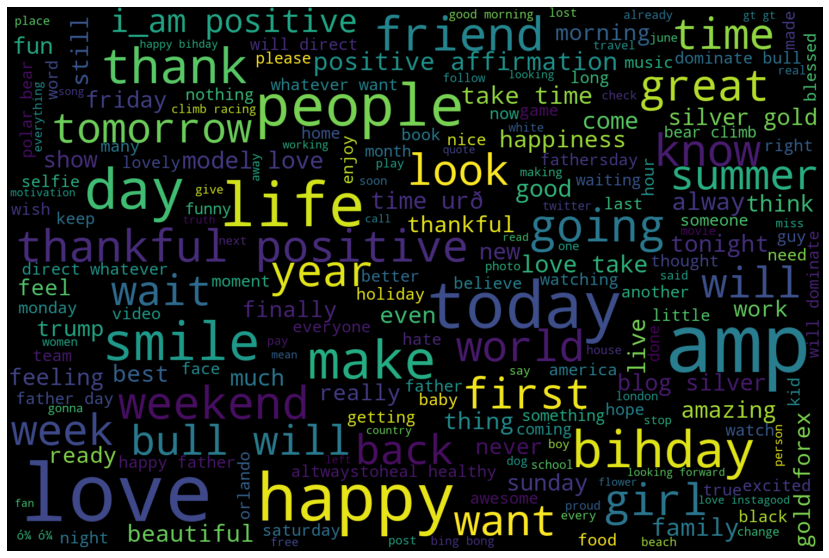

In [20]:
all_words = ' '.join([text for text in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1500, height = 1000, random_state =21, max_font_size=150).generate(all_words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### NON RACIST WORDS

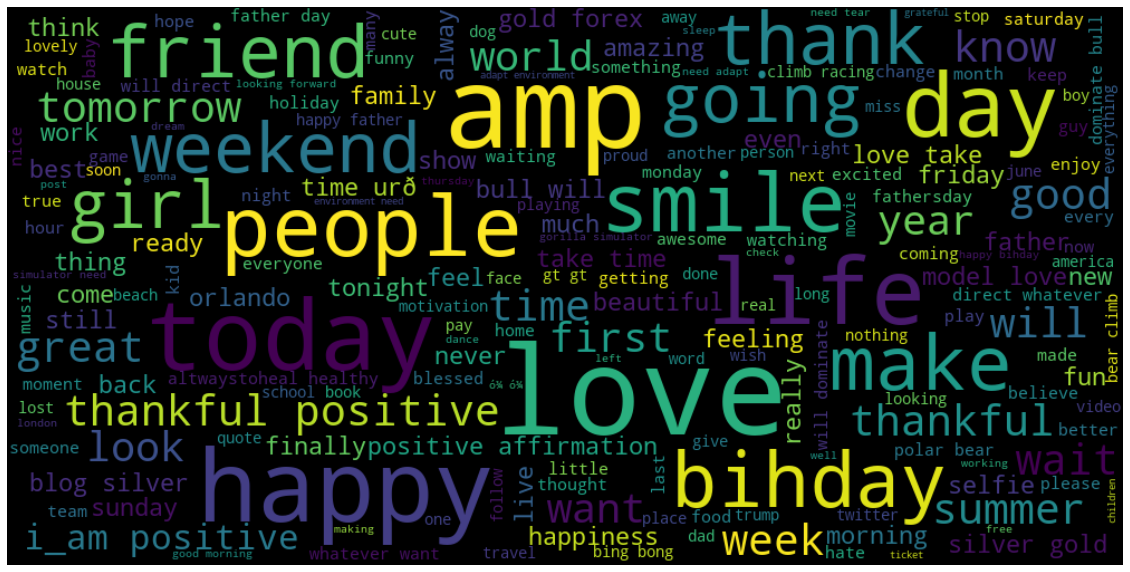

In [24]:
normal_words =' '.join([text for text in df['clean_tweet'][df['label'] == 0]])

wordcloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### creating function to collect hastags

In [28]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [30]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(df['clean_tweet'][df['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['clean_tweet'][df['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

### Non-Racist/Sexist Tweets

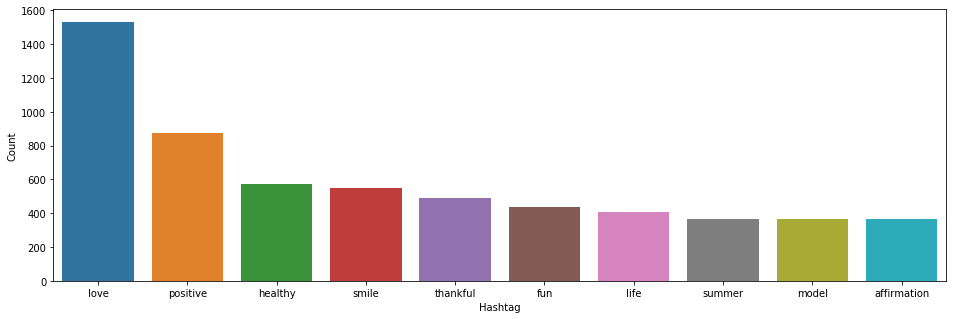

In [31]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

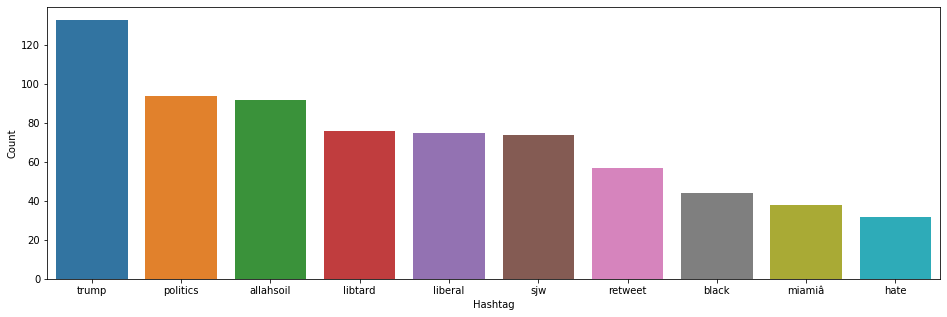

In [32]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


### Extracting Features from Cleaned Tweets
#### Bag or Words

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df =0.90, min_df = 2, max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])


### TF IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['clean_tweet'])

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [51]:
print(train.count())
print(test.count())
print(df.count())

id       31962
label    31962
tweet    31962
dtype: int64
id       17197
tweet    17197
dtype: int64
id             49159
label          31962
tweet          49159
clean_tweet    49159
dtype: int64


In [39]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [56]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) # calculating f1 score

0.5234441602728047

We will use to model to predict on test data

In [57]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

### Building model using TF-IDF features

In [58]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [61]:
lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5172109443954104